# Predicting Learning Curves of Convolutional Neural Network on CIFAR10

In [1]:
import os
import sys
import glob
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_data(source_dir='./data'):
    
    configs = []
    learning_curves = []
    
    for fn in glob.glob(os.path.join(source_dir, "*.json")):
        with open(fn, 'r') as fh:
            tmp = json.load(fh)
            configs.append(tmp['config'])
            learning_curves.append(tmp['learning_curve'])
    return(configs, learning_curves)
configs, learning_curves = load_data()

In [17]:
N = len(configs)
n_epochs = len(learning_curves[0])

configs_df = pd.DataFrame(configs)
learning_curves = np.array(learning_curves)

configs_ = np.array(list(map(lambda x: list(x.values()), configs)))
configs_.shape

(265, 5)

## Sample learning curves

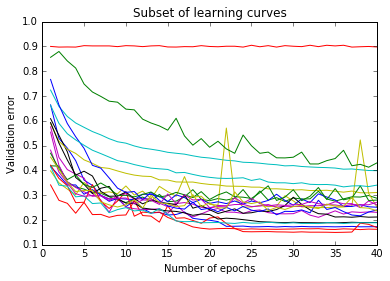

In [4]:
n_subset=20
t_idx = np.arange(1, n_epochs+1)

[plt.plot(t_idx, lc) for lc in learning_curves[:n_subset]]
plt.title("Subset of learning curves")
plt.xlabel("Number of epochs")
plt.ylabel("Validation error")
plt.show()

## Basic Data Exploration

### Histogram and CDF over the final error rate

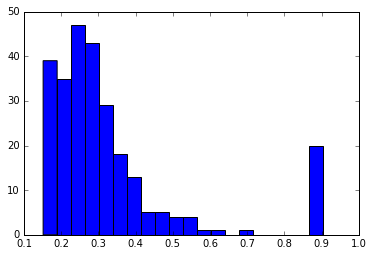

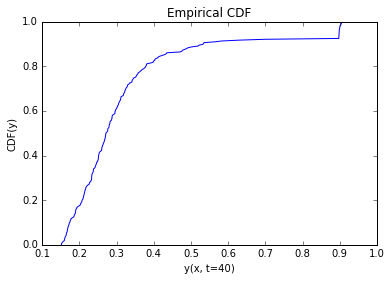

In [5]:
sorted = np.sort(learning_curves[:, -1])
h = plt.hist(sorted, bins=20)
plt.show()

yvals = np.arange(len(sorted))/float(len(sorted))
plt.plot(sorted, yvals)
plt.title("Empirical CDF")
plt.xlabel("y(x, t=40)")
plt.ylabel("CDF(y)")
plt.show()

### Histogram and CDF over all error rates

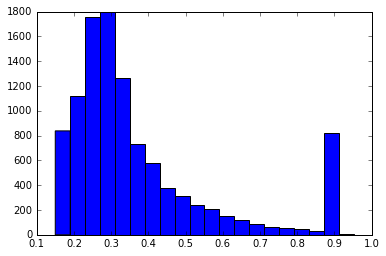

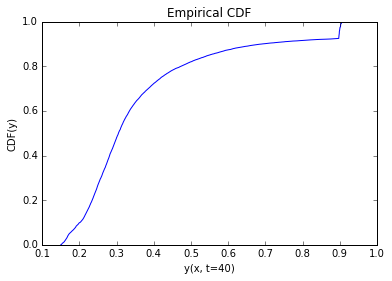

In [6]:
all_values = np.sort(learning_curves.flatten())

h = plt.hist(all_values, bins=20)
plt.show()

yvals = np.arange(all_values.shape[0])/all_values.shape[0]
plt.plot(all_values, yvals)
plt.title("Empirical CDF")
plt.xlabel("y(x, t=40)")
plt.ylabel("CDF(y)")
plt.show()